#IMPORTING , UNZIPPING AND VISUALISING THE DATASET

In [0]:
from zipfile import ZipFile
file_name = "cats_and_dogs_filtered.zip"
with ZipFile(file_name,'r') as zip:
    zip.extractall()

##CREATING SUBDIRECTORY OF CAT DATASET

In [0]:
import os
import pandas as pd
filenames = os.listdir("cats_and_dogs_filtered/train/cats")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'cat':
        categories.append(1)
    else:
        categories.append(0)

df1= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

## CREATING SUBDIRECTORY OF DOG DATASET

In [0]:
import os
import pandas as pd
filenames = os.listdir("cats_and_dogs_filtered/train/dogs")
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(0)
    else:
        categories.append(1)

df2= pd.DataFrame({
    'filename': filenames,
    'category': categories
})

**Plotting a random cat image** 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shuffle', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


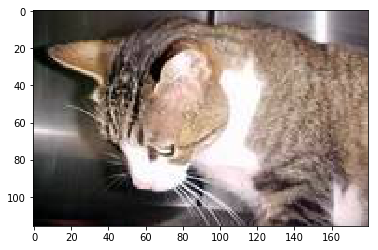

In [0]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('../content/cats_and_dogs_filtered/train/cats/cat.273.jpg')
imgplot = plt.imshow(img)
plt.show()

**Plotting more than one cat images in a single frame**

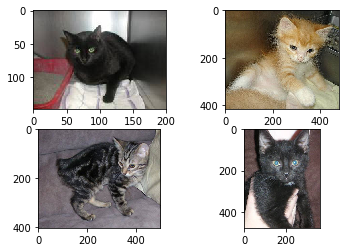

In [0]:
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax4=plt.subplot(2,2,4)
img1=mpimg.imread('../content/cats_and_dogs_filtered/train/cats/cat.274.jpg')
img2=mpimg.imread('../content/cats_and_dogs_filtered/train/cats/cat.275.jpg')
img3=mpimg.imread('../content/cats_and_dogs_filtered/train/cats/cat.276.jpg')
img4=mpimg.imread('../content/cats_and_dogs_filtered/train/cats/cat.272.jpg')
ax1.imshow(img1)
ax2.imshow(img2)
ax3.imshow(img3)
ax4.imshow(img4)

**Appending the Dog Dataset to Cat Dataset**

In [0]:
df1=df1.append(df2, ignore_index=True) 

**Shuffling both the Cat and Dog dataset together**

In [0]:
from sklearn.utils import shuffle
df3 = shuffle(df1, random_state=0)
df3

,filename,category
405,cat.829.jpg,1
1190,dog.549.jpg,0
1132,dog.937.jpg,0
731,cat.718.jpg,1
1754,dog.688.jpg,0
1178,dog.257.jpg,0
1533,dog.392.jpg,0
1303,dog.87.jpg,0
1857,dog.373.jpg,0
18,cat.663.jpg,1


**Resetting the index of the newly created Dataframe**

In [0]:
df3.reset_index(drop=True,inplace = True)

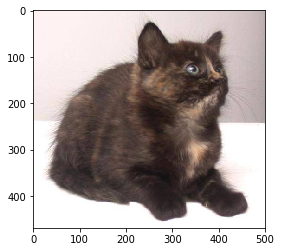

In [0]:
import matplotlib.pyplot as plt
im = plt.imread('cats_and_dogs_filtered/train/cats/cat.189.jpg')
plt.imshow(im)
plt.show()

**Random Sampling of Cat and Dog Dataset**

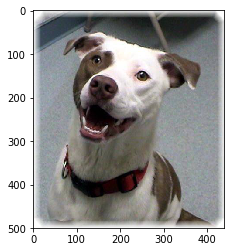

In [0]:
import random
sam = random.choice(filenames)
abc = filename.split('.')[0]
if abc == 'cat':
	image = plt.imread('cats_and_dogs_filtered/train/cats/'+sam)
else:
	image = plt.imread('cats_and_dogs_filtered/train/dogs/'+sam)
plt.imshow(image)

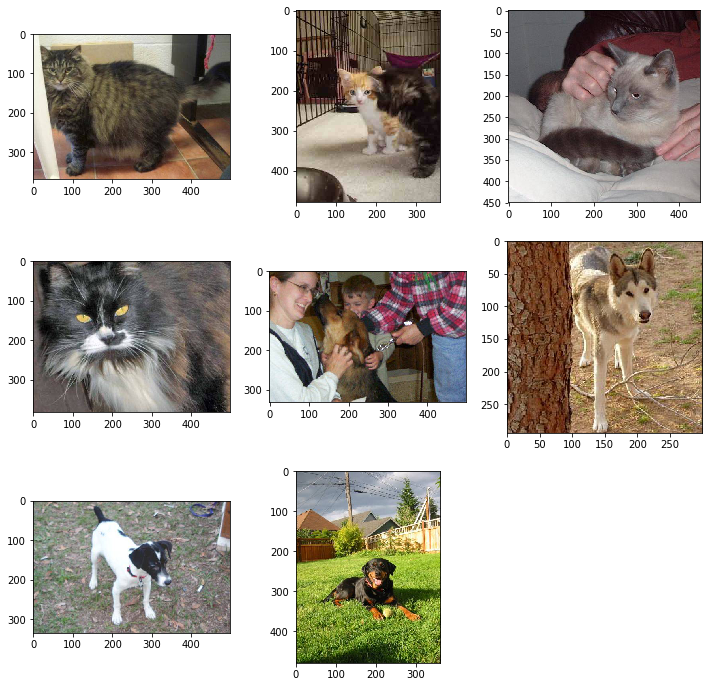

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg #The image module supports basic image loading, rescaling and display operations.

train_cat_fnames = os.listdir("cats_and_dogs_filtered/train/cats")
train_dog_fnames = os.listdir("cats_and_dogs_filtered/train/dogs")
nrows = 3
ncols = 3
pic_index = 0
pic_index += 4
next_cat_pix = [os.path.join("cats_and_dogs_filtered/train/cats", fname)
               for fname in train_cat_fnames[pic_index-4:pic_index]]
next_dog_pix = [os.path.join("cats_and_dogs_filtered/train/dogs", fname)
               for fname in train_dog_fnames[pic_index-4:pic_index]]
fig=plt.gcf()
fig.set_size_inches(ncols*4,nrows*4)
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##Train Dataset

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        'cats_and_dogs_filtered/train',
        target_size=(224, 224),
        batch_size=32,
        class_mode='binary',shuffle=True)

Found 2000 images belonging to 2 classes.


#DATA AUGMENTATION

In [0]:
train_data = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow_from_directory(
        'cats_and_dogs_filtered/train', 
        target_size=(224, 224), 
        batch_size=20,
        class_mode='binary')

validation_generator = test_data.flow_from_directory(
        "../content/cats_and_dogs_filtered/validation",
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#VALIDATION AND TEST

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = test_datagen.flow_from_directory(
        "../content/cats_and_dogs_filtered/validation",
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


#Model Generator

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [0]:
img_input=layers.Input(shape=(224,224,3))


x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)
output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

**FULL MODEL USING DROPOUT FOR REMOVING OUT OUTLIERS**

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

# MODEL COMPILING USING OPTIMIZERS

In [0]:
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

**Model fit generator**

In [0]:
history = model.fit_generator(generator=train_generator,steps_per_epoch=100,epochs=5,validation_data = validation_generator,validation_steps=50,verbose=2)

Epoch 1/5
100/100 - 150s - loss: 0.6947 - acc: 0.5140 - val_loss: 0.6902 - val_acc: 0.5040
Epoch 2/5
100/100 - 146s - loss: 0.6903 - acc: 0.5430 - val_loss: 0.7039 - val_acc: 0.5070
Epoch 3/5
100/100 - 145s - loss: 0.6840 - acc: 0.5750 - val_loss: 0.6730 - val_acc: 0.5550
Epoch 4/5
100/100 - 145s - loss: 0.6765 - acc: 0.5735 - val_loss: 0.6701 - val_acc: 0.5680
Epoch 5/5
100/100 - 145s - loss: 0.6658 - acc: 0.6065 - val_loss: 0.6322 - val_acc: 0.6620


# VISUALIZE THE ANALYSIS

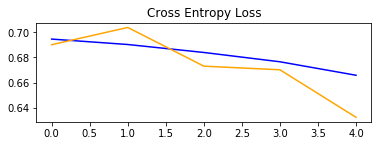

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')



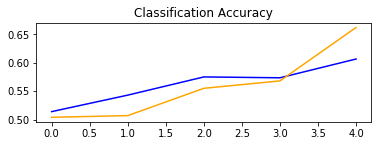

In [0]:
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

# VGG3 Model

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

img_input = layers.Input(shape=(224, 224, 3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Convolution2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)
model.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 222, 222, 16)      448       
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 111, 111, 16)      0         
_________________________________________________________________
conv2d_257 (Conv2D)          (None, 109, 109, 32)      4640      
_________________________________________________________________
max_pooling2d_77 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_258 (Conv2D)          (None, 52, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_78 (MaxPooling (None, 26, 26, 64)        0  

In [0]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.optimizers import Adadelta

model.compile(loss='binary_crossentropy',
             optimizer=Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0),
             metrics=['acc'])

In [0]:
history = model.fit_generator(
     train_generator,
     steps_per_epoch=100,  # 2000 images = batch_size * steps
     epochs=10,
     validation_data=validation_generator,
     validation_steps=50,  # 1000 images = batch_size * steps
     verbose=2)


Epoch 1/10
100/100 - 144s - loss: 0.6972 - acc: 0.5190 - val_loss: 0.6873 - val_acc: 0.5000
Epoch 2/10
100/100 - 140s - loss: 0.6905 - acc: 0.5395 - val_loss: 0.6815 - val_acc: 0.5070
Epoch 3/10
100/100 - 140s - loss: 0.6899 - acc: 0.5645 - val_loss: 0.6831 - val_acc: 0.5740
Epoch 4/10
100/100 - 140s - loss: 0.6773 - acc: 0.5800 - val_loss: 0.6472 - val_acc: 0.6350
Epoch 5/10
100/100 - 141s - loss: 0.6654 - acc: 0.6075 - val_loss: 0.6466 - val_acc: 0.6080
Epoch 6/10
100/100 - 140s - loss: 0.6458 - acc: 0.6330 - val_loss: 0.6347 - val_acc: 0.6180
Epoch 7/10
100/100 - 140s - loss: 0.6293 - acc: 0.6450 - val_loss: 0.6016 - val_acc: 0.6530
Epoch 8/10
100/100 - 140s - loss: 0.6099 - acc: 0.6595 - val_loss: 0.6122 - val_acc: 0.6530
Epoch 9/10
100/100 - 140s - loss: 0.6068 - acc: 0.6705 - val_loss: 0.5913 - val_acc: 0.6870
Epoch 10/10
100/100 - 140s - loss: 0.5977 - acc: 0.6785 - val_loss: 0.5816 - val_acc: 0.6940


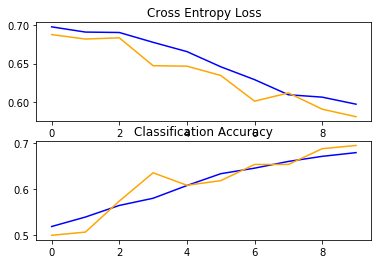

In [0]:
import sys
from matplotlib import pyplot
# plot loss
pyplot.subplot(211)
pyplot.title('Cross Entropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
pyplot.subplot(212)
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['acc'], color='blue', label='train')
pyplot.plot(history.history['val_acc'], color='orange', label='test')
pyplot.show()

#TRANSFER LEARNING

##Find out weights

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2019-07-05 17:32:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   167MB/s    in 0.5s    

2019-07-05 17:32:58 (167 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



# LOADING PREDEFINING WEIGHTS FOR EACH CNN LAYERS ONLY
##(NO DENSE LAYERS)


**INCEPTION V3 MODEL**

In [0]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(
    input_shape=(224,224, 3), include_top=False, weights=None)
pre_trained_model.load_weights(local_weights_file)

In [0]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_260 (Conv2D)             (None, 111, 111, 32) 864         input_21[0][0]                   
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 111, 111, 32) 96          conv2d_260[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 111, 111, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

#APPLYING NEW DENSE LAYER AS PER CHOICE

In [0]:
# first: train only the top layers (which were randomly initialized)
# i.e. freeze all convolutional InceptionV3 layers
for layer in pre_trained_model.layers:
   layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7')
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(1, activation='sigmoid')(x)
model = Model(pre_trained_model.input, x)

#Compiling The Model

In [0]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.02),
             metrics=['acc'])

In [0]:
history = model.fit_generator(generator=train_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_data = validation_generator,
                              validation_steps=50,
                              verbose=2)

Epoch 1/5
100/100 - 483s - loss: 2.6423 - acc: 0.8085 - val_loss: 0.1772 - val_acc: 0.9390
Epoch 2/5
100/100 - 473s - loss: 0.2886 - acc: 0.8970 - val_loss: 0.0504 - val_acc: 0.9820
Epoch 3/5
100/100 - 473s - loss: 0.2334 - acc: 0.9150 - val_loss: 0.0692 - val_acc: 0.9760
Epoch 4/5
100/100 - 473s - loss: 0.1883 - acc: 0.9355 - val_loss: 0.0706 - val_acc: 0.9750
Epoch 5/5
100/100 - 476s - loss: 0.1570 - acc: 0.9345 - val_loss: 0.0535 - val_acc: 0.9790


# FOR FINETUNING PROCESS


In [0]:
from tensorflow.keras.optimizers import SGD

unfreeze = False

for layer in pre_trained_model.layers:
  if unfreeze:
    layer.trainable = True
  if layer.name == 'mixed6':
    unfreeze = True

model.compile(loss='binary_crossentropy',
              optimizer=SGD(
                  lr=0.00001, 
                  momentum=0.9),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/5
100/100 - 528s - loss: 0.1625 - acc: 0.9370 - val_loss: 0.0523 - val_acc: 0.9830
Epoch 2/5
100/100 - 517s - loss: 0.1679 - acc: 0.9330 - val_loss: 0.0535 - val_acc: 0.9830
Epoch 3/5
100/100 - 518s - loss: 0.1606 - acc: 0.9400 - val_loss: 0.0559 - val_acc: 0.9820
Epoch 4/5
100/100 - 521s - loss: 0.1755 - acc: 0.9365 - val_loss: 0.0547 - val_acc: 0.9820
Epoch 5/5
100/100 - 519s - loss: 0.1544 - acc: 0.9410 - val_loss: 0.0557 - val_acc: 0.9820
